In [259]:
!pip install tensorflow
!pip install matplotlib numpy pillow tensorflow ipython

# Lets you display and draw images, graphs, and results
import matplotlib.pyplot as plt

# Lets you work with numbers and image data as arrays
import numpy as np

# Lets you find and work with files and folders on your computer
import os

# Lets you open and process image files so they can go into the model
from PIL import Image   # (use this instead of 'import PIL')

# The main tool for building, training, and using smart models (machine learning)
import tensorflow as tf

# A shortcut inside TensorFlow that makes it easier to build and use models
from tensorflow import keras

# Lets you build your model using different types of "layers" (each layer learns different things about the picture)
from tensorflow.keras import layers

# "Dense" is the layer that makes the final decision; "Flatten" prepares image data for those layers
from tensorflow.keras.layers import Dense, Flatten

# Lets you stack layers in order, building your model step by step
from tensorflow.keras.models import Sequential

# Helps your model learn efficiently and improve with practice (training)
from tensorflow.keras.optimizers import Adam



# Preparing the Data
## 📝 Summary: Why Did We Do All This?

1. **Tell Python where your images are**  
   So your code knows the correct folder to look for pictures.

2. **Check that images are actually there and readable**  
   Make sure the files and folders are correct and can be opened before doing anything complicated.

3. **Prepare the data for the model**  
   - Resize every image to the same size (e.g., 180x180).
   - Organize the images into small groups (batches) for easier processing.

4. **Split images into training and validation groups**  
   - Training group: for teaching the model.
   - Validation group: for checking if the model is actually learning, not just memorizing.
   - Using a `seed` makes this split the same every time you run the code.

5. **Visualize a few sample images with labels**  
   - See real examples to spot mistakes before starting training.

---

**In short:**  
These steps help make sure your images are found, organized, labeled, and ready for the model to learn from—while also helping you catch problems early!


In [116]:
# Prepearing the Data
# Helps python handle folder and file paths on os easily
import pathlib

# Tells where each image is located
data_dir = r'C:\Users\alihu\codingprojects\GarbageProject\garbage_classification'  # Your local dataset path

# Prepare the folder path, so it is easy to be refrenced
data_dir = pathlib.Path(data_dir)  # Makes it easier to work with in Python

# Printing the Path to the photos file
print(data_dir)

C:\Users\alihu\codingprojects\GarbageProject\garbage_classification


C:\Users\alihu\codingprojects\GarbageProject\garbage_classification\trash\trash103.jpg


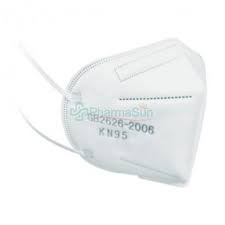

In [117]:
# Looks inside the folder 'trash' and makes a list of all the files (images)
trash = list(data_dir.glob('trash/*'))

# Prints out the location (path) of the first picture in the trash folder
print(trash[5])

# Imports the Image class from PIL so you can open image files
from PIL import Image
# Displays Image in Juypter notebook
from IPython.display import display

# Uses PIL's Image class to open the first image
img = Image.open(str(trash[5]))

# If you want to see the image (in Jupyter or some editors):
display(img)


In [118]:
# Setting up Image

# Every image will be 180x180 px (width, height)
img_height,img_width=180,180

# The model will look at 32 images at a time while training
batch_size=32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  # Where the images are at
  data_dir,
  # How much of the images are set for validation
  validation_split=0.2,
  # What is the other subset portion is called, this is training the rest is validation
  subset="training",
  # Ensures images are split into training and validation groups the same way every time
  seed=123,
  # Resize the images, to img height and width
  image_size=(img_height, img_width),
  # How many images goes through the model at ones
  batch_size=batch_size)

Found 14570 files belonging to 11 classes.
Using 11656 files for training.


In [119]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 14570 files belonging to 11 classes.
Using 2914 files for validation.


In [120]:
# Printing all the class names, that will be used in the data set
class_names = train_ds.class_names
print(class_names)

['biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']


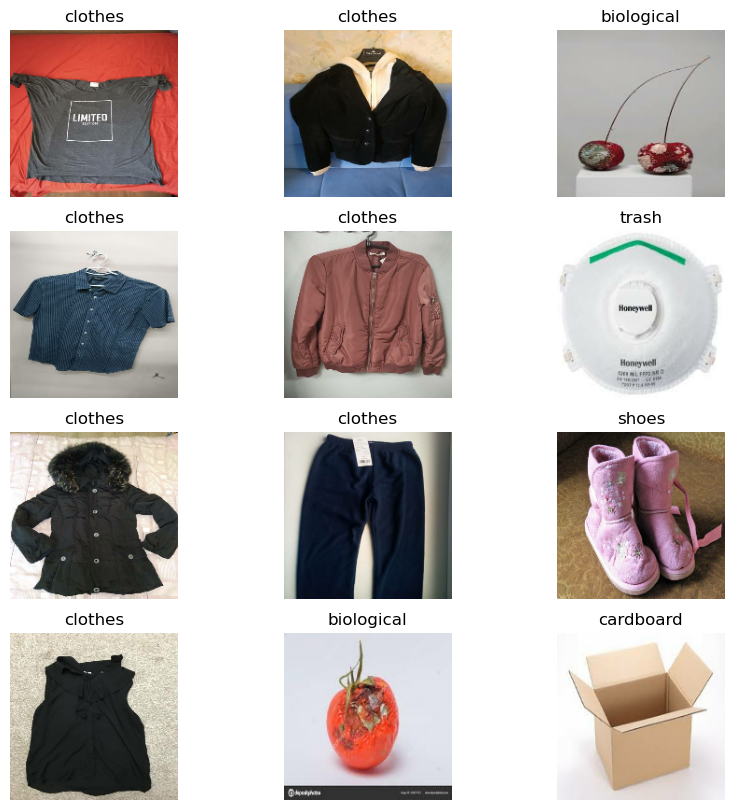

In [121]:
# Basically plots the images, with the right labels, or labels of the directory
import matplotlib.pyplot as plt

# Sets a figure to draw the images
plt.figure(figsize=(10, 10))

# Takes the first batch of images and their labels from dataset
for images, labels in train_ds.take(1):
  for i in range(12):
    # create the subplot 3 columns, 4 rows, 
    # subplot starts at 1, but for loop starts at 0, so use i+1 to match the numbering
    ax = plt.subplot(4,3, i + 1)
    # Shows the actually picture
    plt.imshow(images[i].numpy().astype("uint8"))
    # adds the label the classname as title
    plt.title(class_names[labels[i]])
    # removes, the axxies, to give it a clearner look
    plt.axis("off")

# Training the Model

In [123]:
# Creates a model, which will be bulit by stacking layers one after another
# Each layers captures details, first one, capture simple and it gets more complex
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(
                    include_top=False,  # Don't Include the output layer, will be down manually
                   input_shape=(180,180,3), # shape of the images (width, height, color0
                   pooling='avg', # tells model to take imp imformation found from image, and average it into short, simple list of numbers
                   classes=11,  # not needed, but was used
                   weights='imagenet') # Start with a model that has alraedy been trained on images

# Tells the model to not change with ResNet50 has learned from millions of images
for layer in pretrained_model.layers:
        layer.trainable=False

# Stacking the image recgonizaqtion ablity within ResNet50, onto the new model
resnet_model.add(pretrained_model)
# Takes the imp info, and coverts them to a long list of numbers?
resnet_model.add(Flatten())

# Any layer before the final layer is a thinking/decision making layer, helps the model combine info learned
# The final dense layer is the output layer, decides what class the image belongs to 

# 512, are the amount of neurons, and ReLU, is an activation function, that helps the network learn ocmplicated things by combine information in powerfujl way
resnet_model.add(Dense(512, activation='relu'))

# Means there is 11 classes to predict from
# Softmax makes sure that models proablity for each class, adds up to 1
resnet_model.add(Dense(11, activation='softmax'))

In [124]:
# Shows all the layers of my model, and how many parameters each has, and how teh data flows
# parameters are numbers inside model (weights, bias) that change while learning, these number change to make better predictions
resnet_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 11)                  │           5,643 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,642,443 (94.00 MB)

 Trainable params: 1,054,731 (4.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [125]:
# This part gets the model ready to learn from data

resnet_model.compile(
    # Adam is like a coach: it tells the model how to adjust itself after each mistake
    # The learning rate controls how big each adjustment is: smaller is safer, bigger is faster but riskier
    optimizer=Adam(learning_rate=0.001),
    # The rule for measuring how wrong the model's guesses are (used for multi-class classification)
    loss='sparse_categorical_crossentropy',
    # Tells the model to track how often its guesses are correct (accuracy)
    metrics=['accuracy']
)


In [126]:
# This part trains your model using the data

epochs = 3  # The model will look at every training image 10 times

# 'history' will save how well the model did after each round (epoch)
history = resnet_model.fit(
    train_ds,              # The training images and their labels (for learning)
    validation_data=val_ds, # The validation images and labels (to check how well it learned, not for teaching)
    epochs=epochs          # How many times the model goes through all the training images
)

 

Epoch 1/3
365/365 ━━━━━━━━━━━━━━━━━━━━ 620s 2s/step - accuracy: 0.8140 - loss: 0.6615 - val_accuracy: 0.9221 - val_loss: 0.2293
Epoch 2/3
365/365 ━━━━━━━━━━━━━━━━━━━━ 583s 2s/step - accuracy: 0.9433 - loss: 0.1734 - val_accuracy: 0.9348 - val_loss: 0.2131
Epoch 3/3
365/365 ━━━━━━━━━━━━━━━━━━━━ 599s 2s/step - accuracy: 0.9729 - loss: 0.0859 - val_accuracy: 0.9348 - val_loss: 0.2185


# Evaluating the Model

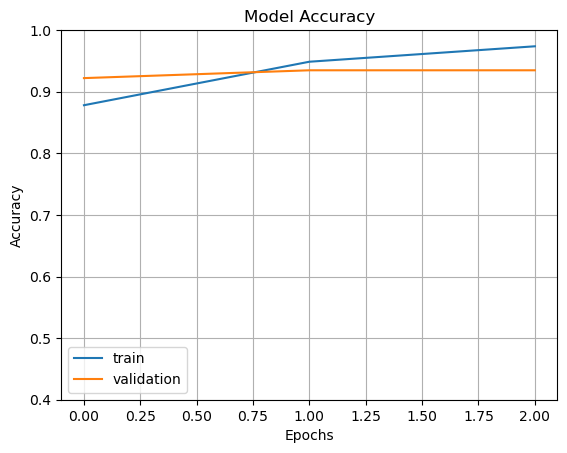

In [128]:

# Shows the graph of how accuracy changes, with every Epoch
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

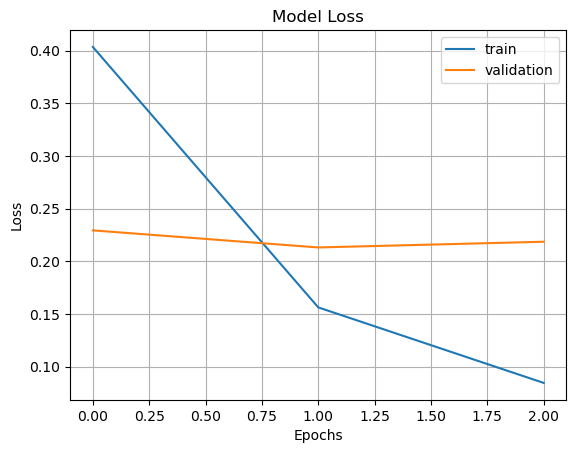

In [129]:
# Shows how wrong the model prediciton were, after every enroch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Making Predictions

In [165]:
!pip install opencv-python
import cv2
image = cv2.imread(str(cardboard[0]))  # Now 'cardboard[0]' works!
image_resized = cv2.resize(image, (img_height, img_width))
image = np.expand_dims(image_resized, axis=0)
print(image.shape)

(1, 180, 180, 3)


In [193]:
class_to_bin = {
    'biological': 'Green bin',         # if this means compost (food/organics)
    'brown-glass': 'Dark blue box',    # containers (glass)
    'green-glass': 'Dark blue box',    # containers (glass)
    'white-glass': 'Dark blue box',    # containers (glass)
    'metal': 'Dark blue box',          # containers
    'plastic': 'Dark blue box',        # containers
    'cardboard': 'Light blue box',     # paper products
    'paper': 'Light blue box',         # paper products
    'clothes': 'Black garbage',        # textile = garbage
    'shoes': 'Black garbage',          # textile = garbage
    'trash': 'Black garbage'           # general garbage
}

bin_to_pic = {
    'Green bin': 'compost.jpg',
    'Dark blue box': 'darkblue.jpg',
    'Light blue box': 'lightblue.jpg',
    'Black garbage' : 'garbagebag.jpg'
}

# Setting the bins to images


In [246]:
from PIL import Image as PILImage
import numpy as np
import io 
from IPython.display import display

# Upload for manual testing

link = r"C:\Users\alihu\Downloads\testinginput.jpg"
def predictImage(url, img_height, img_width, resnet_model, class_names, class_to_bin, bin_to_pic):    
    # Opens the image using PIL, and converts the image into RGB mode
    img = PILImage.open(url).convert("RGB")
    # Resizes the img to default image height and width
    img = img.resize((img_height, img_width))

    # Convert the image into an array
    image_array = np.array(img)

    # adds an dim, to let the model know the batch size
    image_array = np.expand_dims(image_array, axis=0)

    # 2. PREDICT:
    # Tells the trained model to make an prediction on the input image
    pred = resnet_model.predict(image_array)

    # argmax, gives you the index of highest value in pred
    predicted_class = class_names[np.argmax(pred)]

    # Maps the predicted class to the bin names, and if the predicted class isn't mapped it writes unknown
    predicted_bin = class_to_bin.get(predicted_class, 'Unknown')

    # Maps the predicted class with the images
    predicted_image = bin_to_pic.get(predicted_bin, 'Unknown')


    # Print out the text and image of the prediction
    return print(f"Class: {predicted_class}"), print(f"Bin: {predicted_bin}")

  

In [248]:
predictImage(link, img_height, img_width, resnet_model, class_names, class_to_bin, bin_to_pic)


 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Class: clothes
Bin: Black garbage


(None, None)

In [268]:
# export as h5 file
from tensorflow import keras
resnet_model.save('my_model.keras')

In [284]:
# Create JSON files with the important variables 6
import json

config = {
    "img_height": 180,
    "img_width": 180,
    "class_names": [
        'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass',
        'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass'
    ],
    "class_to_bin": {
        'biological': 'Green bin',
        'brown-glass': 'Dark blue box',
        'green-glass': 'Dark blue box',
        'white-glass': 'Dark blue box',
        'metal': 'Dark blue box',
        'plastic': 'Dark blue box',
        'cardboard': 'Light blue box',
        'paper': 'Light blue box',
        'clothes': 'Black garbage',
        'shoes': 'Black garbage',
        'trash': 'Black garbage'
    },
    "bin_to_pic": {
        'Green bin': 'compost.jpg',
        'Dark blue box': 'darkblue.jpg',
        'Light blue box': 'lightblue.jpg',
        'Black garbage': 'garbagebag.jpg'
    }
}

with open("model_config.json", "w") as f:
    json.dump(config, f)



In [286]:
import json

# Load your config file
with open("model_config.json", "r") as f:
    config = json.load(f)

# Print everything to verify
print("img_height:", config.get("img_height"))
print("img_width:", config.get("img_width"))
print("class_names:", config.get("class_names"))
print("class_to_bin:", config.get("class_to_bin"))
print("bin_to_pic:", config.get("bin_to_pic"))

img_height: 180
img_width: 180
class_names: ['biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']
class_to_bin: {'biological': 'Green bin', 'brown-glass': 'Dark blue box', 'green-glass': 'Dark blue box', 'white-glass': 'Dark blue box', 'metal': 'Dark blue box', 'plastic': 'Dark blue box', 'cardboard': 'Light blue box', 'paper': 'Light blue box', 'clothes': 'Black garbage', 'shoes': 'Black garbage', 'trash': 'Black garbage'}
bin_to_pic: {'Green bin': 'compost.jpg', 'Dark blue box': 'darkblue.jpg', 'Light blue box': 'lightblue.jpg', 'Black garbage': 'garbagebag.jpg'}
